In [36]:
#########################################
# Chargement des bibliothèques          #
#########################################
%matplotlib inline
import os
import pandas
import pandas_profiling
import numpy
from datetime import date,datetime,timedelta
import pylab
from pymongo import MongoClient
# pprint library is used to make the output look more pretty
from pprint import pprint
from pandas import DataFrame
import matplotlib.pyplot  as pyplot

path ="/home/user/Documents/STA211-Datamining/Projet_STA"
os.chdir(path)


## Récupération des données et selection des variables


Les données sont stockées dans une base MongoDB réalisée lors des exercices de l'UE NFE204.

In [2]:
#########################################
# Chargement des données depuis MongoDB #
#########################################

# connect to MongoDB, change the << MONGODB URL >> to reflect your own connection string
client = MongoClient('localhost:27017')
db=client.airbnb

#1ère sélection des variables en fonction du taux de remplissage et des valeurs possibles

#Suppression des données de type texte (à analyser sur le projet RCP216 avec les données de type commentaires ?)
rec = db.listings.find({})
airbnb_complet = DataFrame(list(rec))
profile = pandas_profiling.ProfileReport(airbnb_complet)
profile.to_file(outputfile='airbnb_initial.html')
del airbnb_complet

La sélection des variables est réalisée en fonction de l'analyse monovariée générée à partir de la librairie pandas-profiling.

http://htmlpreview.github.io/?https://github.com/ddupontDS/project-ds/blob/master/STA211/Analyse/airbnb_initial.html



In [12]:
#Suppression des données de type texte (à analyser sur le projet RCP216 avec les données de type commentaires ?)
#suppression egalement de toutes url : liens vers annonce, photos, propriétaire
#Puis 1ère sélection des variables en fonction du taux de remplissage et des valeurs possibles issues de pandas-profiling


rec = db.listings.find({},
{"_id" : 1, # id de l'annonce, conservé comme index de ligne et pour pouvoir recroiser avec d'autres extractions si nécéssaire. 
            # Cet ID permet également, si l'annonce est toujours en ligne d'y accéder sur le site AirBnB de la manière suivante : https://www.airbnb.com/rooms/_id
#    "last_scraped" : 1, #date de récupération de lannonce => sur 3 jours en Avril 2017
    "name" : 1, # permet d'avoir un descriptif succint lors de l'interprétation des données
#   "experiences_offered" : 1, que la valeur None
#   "notes" : 1,#texte à analyser en textmining => infos sur Agence, professionnel ...
    "host_id" : 1, #identifiant du propriétaire
#    "host_name" : 1, # que des prénoms à utiliser en textmining pour voir si Host se retrouve dans les commentaires ?
    "host_since" : 1, #date à transformer en durée  pour déterminer une ancienneté?
#    "host_location" : 1, #pas très intéréssant car grande majorité sur Paris et pour le reste très dispersé
#    "host_response_time" : 1, # rapidité de réponse; on garde plutôt la variable suivante pour savoir si le propriétaire répond au non; à recoder en binaire
    "host_response_rate" : 1, # taux de réponse
    "host_is_superhost" : 1, # True/False
#    "host_neighbourhood" : 1, #zone de texte
    "host_listings_count" : 1, # nombre d'appartement
#    "host_total_listings_count" : 1, #pas de différence avec le précédent
#    "host_verifications" : 1, #difficile à analyser on garde la valeur suivante
    "host_identity_verified" : 1,# True/False
#    "neighbourhood" : 1, Zone de texte
#     "neighbourhood_cleansed" : 1,
    "zipcode" : 1, # à nettoyer car caractère bizarres
    "latitude" : 1, #conservé pour représentation carto
    "longitude" : 1,#conservé pour représentation carto
#    "is_location_exact" : 1,
    "property_type" : 1, # 95% Appartements - intéressant pour voir si les autres sont atypiques
    "room_type" : 1, # 85% où appartement complet, sinon chambre privée ou partagée
    "accommodates" : 1, #entre 1 et 16 pièce => recodage en qual ?
    "bathrooms" : 1, #entre 0 et 8 mais Q4 toujours à 1 => recodage en qual 0,1,plusieurs
    "bedrooms" : 1, #entre 0 et 10 mais Q4 toujours à 1 => recodage en qual 0,1,plusieurs
    "beds" : 1, #entre 1 et 16 mais Q4 toujours à 2 => recodage en qual 1,2,plus de 2
    "bed_type" : 1, #regroupement des valeurs faibles
#    "square_feet" :1, #conversion en m² et passage des 0 à NaN => inutile que 4% des cas renseignés
    "price" : 1, #conversion en nombre et passage des 0 à NaN
#    "weekly_price" : 1,# trop de valeurs manquantes; conversion en nombre et passage des 0 à NaN vérifier si complement des NaN Price
#   "monthly_price" : 1,#trop de valeurs manquantes; conversion en nombre et passage des 0 à NaN vérifier si complement des NaN Price
#    "security_deposit" : 1,# 40.7% missing values
    "cleaning_fee" : 1,#conversion en nombre et passage des 0 à NaN
#    "guests_included" : 1, #???
#    "extra_people" : 1,#conversion en nombre et passage des 0 à NaN
#    "minimum_nights" : 1, #difficile à interpréter
#    "maximum_nights" : 1,#difficile à interpréter
    "availability_30" : 1, #découpage en quantile
    "availability_60" : 1,#découpage en quantile
    "availability_90" : 1,#découpage en quantile
    "availability_365" : 1,#découpage en quantile
    "number_of_reviews" : 1, #nombre de commentaire => on garde les 0
    "first_review" : 1, #date à transformer en nb de mois pour déterminer une ancienneté?
    "last_review" : 1, #date à transformer en nb de mois pour déterminer une ancienneté?
    "review_scores_rating" : 1, #notes
    "review_scores_accuracy" : 1,#notes
    "review_scores_cleanliness" : 1,#notes
    "review_scores_checkin" : 1,#notes
    "review_scores_communication" : 1,#notes
    "review_scores_location" : 1,#notes
    "review_scores_value" : 1,#notes
#    "requires_license" : 1, #toujours à False
#    "jurisdiction_names" : 1, #toujours Paris
    "instant_bookable" : 1,#True/False ; peux identifier des loeurs professionnels ?
    "cancellation_policy" : 1, #regroupement des faibles modalités
#    "require_guest_profile_picture" : 1, #True/False pas d'intérêt 
#    "require_guest_phone_verification" : 1,#True/False pas d'interêt
    "calculated_host_listings_count" : 1, #permet de voir les multi-détentions dans l'échantillon
    "reviews_per_month":1 #nombre de commentaires moyen par mois

 #on est à 38 variables conservées
 #[56535 rows x 38 columns]

})

airbnb = DataFrame(list(rec))

# Je fais le choix métier de considérer que les appartements n'ayant pas de commentaires ne sont pas intéressants dans le cadre de l'étude
# En effet, soit ils n'ont jamais été loués, soit si faiblement que personne n'a commenté l'appartement
# j'ai aussi trouvé des cas en regardant les appartements atypiques qu niveau du prix où les données n'étaient pas correctes au moment du scrapping

airbnb = airbnb[airbnb["number_of_reviews"]>0]
#42365 rows


## Recodage et typage des variables
Suivant les types et la répartition des valeurs, on regroupe des modalités et/ou transforme le type des données

In [13]:
####################################
# Recodage et typage des variables #
####################################

#recodage de la variable accommodates => pas en quartile car intérêt de conserver le type d'appart.
def group_accommodates (x) : 
    val = "X" 
    if x==1 :
        val = "T1" 
    elif x==2 :
        val = "T2"
    elif x==3 :
        val = "T3"
    else :
        val = "T4+"
    return val
airbnb["accommodates"]=airbnb["accommodates"].apply(group_accommodates)
airbnb["accommodates"]=pandas.Categorical(airbnb["accommodates"],ordered=True)

#Recodages availability en classe sur quantiles
airbnb["availability_30"]=pandas.qcut(airbnb["availability_30"],2,labels=["0_3","4_30"])
airbnb["availability_60"]=pandas.qcut(airbnb["availability_60"],2,labels=["0_8","9_60"])
airbnb["availability_90"]=pandas.qcut(airbnb["availability_90"],2,labels=["0_15","16_90"])
airbnb["availability_365"]=pandas.qcut(airbnb["availability_365"],3,labels=["0_18","19_246","247_365"])

#Recodage bathrooms
def group_bathrooms (x) : 
    val = "X" 
    if x==0 :
        val = "None" 
    elif x==1 :
        val = "One"
    else :
        val = "Many"
    return val
airbnb["bathrooms"]=airbnb["bathrooms"].apply(group_bathrooms)
airbnb["bathrooms"]=pandas.Categorical(airbnb["bathrooms"],ordered=True)

#Recodage bed_type
def group_bed_type (x) : 
    val = "X" 
    if x=="Real Bed" :
        val = "Bed" 
    elif x=="Pull-out Sofa" :
        val = "Sofa"
    else :
        val = "Other"
    return val
airbnb["bed_type"]=airbnb["bed_type"].apply(group_bed_type)
airbnb["bed_type"]=pandas.Categorical(airbnb["bed_type"],ordered=True)

#Recodage bedrooms
def group_bedrooms (x) : 
    val = "X" 
    if x==0 :
        val = "None" 
    elif x==1 :
        val = "One"
    else :
        val = "Many"
    return val
airbnb["bedrooms"]=airbnb["bedrooms"].apply(group_bedrooms)
airbnb["bedrooms"]=pandas.Categorical(airbnb["bedrooms"],ordered=True)
#Recodage beds
def group_beds (x) : 
    val = "X" 
    if x==1 :
        val = "One" 
    elif x==2 :
        val = "Two"
    else :
        val = "More_2"
    return val
airbnb["beds"]=airbnb["beds"].apply(group_beds)
airbnb["beds"]=pandas.Categorical(airbnb["beds"],ordered=True)

#Recodage calculated_host_listings_count
def group_calculated_host_listings_count (x) : 
    val = "X" 
    if x==1 :
        val = "One" 
    elif x==2 :
        val = "Two"
    elif x==3 :
        val = "Three"
    else :
        val = "More_3"
    return val
airbnb["calculated_host_listings_count"]=airbnb["calculated_host_listings_count"].apply(group_calculated_host_listings_count)
airbnb["calculated_host_listings_count"]=pandas.Categorical(airbnb["calculated_host_listings_count"],ordered=True)

#regroupement des valeurs faiblement représentées
def group_cancellation_policy (x) : 
    val = "X" 
    if x=="super_strict_60" or x=="super_strict_30" :
        val = "strict" 
    else :
        val = x
    return val
airbnb["cancellation_policy"]=airbnb["cancellation_policy"].apply(group_cancellation_policy)
airbnb["cancellation_policy"]=pandas.Categorical(airbnb["cancellation_policy"],ordered=True)

#pour transformer des zéro en NaN
def to_nan(x):
    val = 0
    if x==0:
        val = numpy.NaN
    else:
        val = x
    return val

#pour transformer les chaîne de caractère montant en $ en nombre
def dollar_to_number (x) : 
    val = 0 
    if x==None:
        val = None
    else :
        val = float(x.replace('$','').replace(",",""))
    return val

airbnb["cleaning_fee"]=airbnb["cleaning_fee"].apply(dollar_to_number).fillna(0)
airbnb["price"]=airbnb["price"].apply(dollar_to_number).apply(to_nan)

#Pour transformer des % en nombre
def percent_to_number (x) : 
    val = 0 
    if x==None:
        val = None
    else :
        val = int(x.replace('%',''))
    return val
airbnb["host_response_rate"]=airbnb["host_response_rate"].apply(percent_to_number).fillna(0)

#Pour définir les variables Qualitatives
airbnb["property_type"]=pandas.Categorical(airbnb["property_type"],ordered=True)
airbnb["room_type"]=pandas.Categorical(airbnb["room_type"],ordered=True)
airbnb["host_identity_verified"]=pandas.Categorical(airbnb["host_identity_verified"],ordered=True)
airbnb["host_is_superhost"]=pandas.Categorical(airbnb["host_is_superhost"],ordered=True)
airbnb["instant_bookable"]=pandas.Categorical(airbnb["instant_bookable"],ordered=True)


#NB : pour les calcul suivant on fait la comparaison des dates avec le 6 Avril 2017 qui est le jour oùu les données ont été "scrappées" sur AirBnB
#transformation de la date de 1er commentaire en nb de jours depuis le 1er commentaire
airbnb["first_review"]=airbnb["first_review"].fillna('2017-04-06')
airbnb["first_review"]=airbnb["first_review"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
airbnb["day_first_review"]=(datetime.strptime('2017-04-06', '%Y-%m-%d').date()-airbnb["first_review"]).dt.days

#transformation de la date de dernier commentaire en nb de jours depuis le dernier commentaire
airbnb["last_review"]=airbnb["last_review"].fillna('2017-04-06')
airbnb["last_review"]=airbnb["last_review"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
airbnb["day_last_review"]=(datetime.strptime('2017-04-06', '%Y-%m-%d').date()-airbnb["last_review"]).dt.days

#transformation de la date 'propriétaire depuis' en nb de jours 
airbnb["host_since"]=airbnb["host_since"].fillna('2017-04-06')
airbnb["host_since"]=airbnb["host_since"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
airbnb["day_host_since"]=(datetime.strptime('2017-04-06', '%Y-%m-%d').date()-airbnb["host_since"]).dt.days

#codage du code postal en arrondissement
airbnb['zipcode']=airbnb['zipcode'].apply(lambda x: str(str(x).replace('.0','')))
def zipcode_to_arrondissement (x) : 
    val = 99.0  #Valeur Autre 
    if x in ['75001','75002','75003','75004','75005','75006','75007','75008','75009','75010','75011','75012','75013','75014',
             '75015','75016','75017','75018','75019','75020'] :
        val = int(x[3:5])
    else :
        val=99.0
    return val
airbnb['arrondissement']=airbnb['zipcode'].apply(zipcode_to_arrondissement)

airbnb = airbnb.drop(["first_review","last_review","host_since","zipcode"],axis = 1)

In [7]:
#2ème passage sur l'analyse des variable pour limiter encore la quantité de variables
profile = pandas_profiling.ProfileReport(airbnb)
profile.to_file(outputfile='airbnb.html')

Suite au recodage et à la transformation des données on relance les statistiques descriptives à partir de la librairie pandas-profiling.

http://htmlpreview.github.io/?https://github.com/ddupontDS/project-ds/blob/master/STA211/Analyse/airbnb.html



## Analyse des données atypiques

Le point le plus "surprenant" est le prix très élevé de certaines location : jusqu'à 5000€ la nuit. Ou très faible : moins de 20 €
Le fait d'avoir supprimé les appartements sans commentaires au départ diminue le nombre de cas mais il reste encore des cas surprenants

<function matplotlib.pyplot.show>

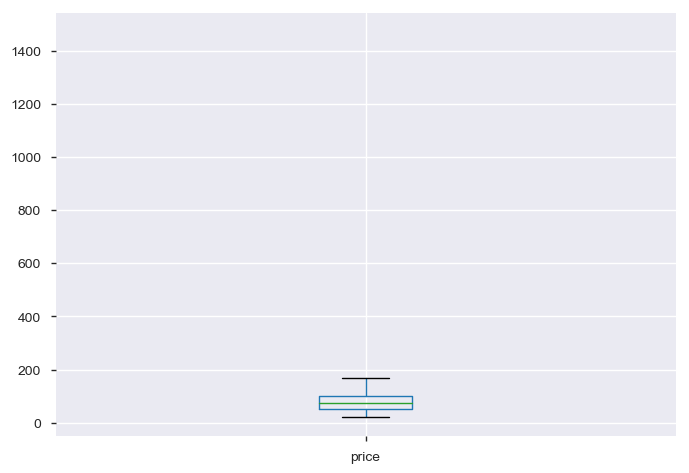

In [19]:
airbnb.boxplot("price")
pylab.show

In [9]:
# extraction des appartements à plus de 500$la nuit ou à moins de 10$
atypique=airbnb[numpy.logical_or(airbnb["price"]>500, airbnb["price"]<20)]

atypique.to_csv('atypique.csv')

En analysant quelques lignes atypiques sur le prix; on voit plusieurs cas : des biens réellement d'exceptions dans des quartiers très recherchés, mais aussi des choses qui paraissent surprenantes. De même en regardant plus en détail les prix inférieur à 20€, soit les annonces n'existent plus, soit il n'y a pas de disponibilité, même si on trouve quelques cas exceptionnels de chambre chez l'habitant. => je décide de supprimer les quelques cas (6) supérieurs à 1500€ et inférieurs à 20€ (90 cas

In [20]:
airbnb = airbnb[numpy.logical_and(airbnb["price"]<=1500,airbnb["price"]>20)]
airbnb["price"].describe()

count    42167.000000
mean        93.138331
std         73.938084
min         21.000000
25%         53.000000
50%         75.000000
75%        100.000000
max       1470.000000
Name: price, dtype: float64

In [21]:
#traitement des valeurs manquantes
airbnb["reviews_per_month"]=airbnb["reviews_per_month"].fillna(0) # que 3 missing
airbnb["host_listings_count"]=airbnb["host_listings_count"].fillna(0) # que 2 missing
airbnb["host_is_superhost"]=airbnb["host_is_superhost"].fillna('f')# que 2 missing
airbnb["host_identity_verified"]=airbnb["host_identity_verified"].fillna('f')# que 2 missing
# il ne reste des valeurs manquantes que sur les notes données par les locataires
# je décide de ne pas les remplacer car l'absence de note est information intéressante 
#et qu'il n'y a pas de raison de les mettre à 0 ou de remplacer par la moyenne


In [40]:
#après cette préparation des données, j'enregistre le fichier pous ne pas avoir à le regénérer lors de la phase d'analyse statistiques
airbnb.to_json('airbnb_V3.json',orient='records',force_ascii = False)

In [22]:
#3ème passage sur l'analyse des variable
profile = pandas_profiling.ProfileReport(airbnb)
profile.to_file(outputfile='airbnb_V2.html')

Suite au traitement de valeurs manquantes et des cas atypiques, on relance les statistiques descriptives

http://htmlpreview.github.io/?https://github.com/ddupontDS/project-ds/blob/master/STA211/Analyse/airbnb_V2.html

En regardant la matrice de corrélations, on visualise une forte corrélation entre les notes données par les locataires.
=> il est intéressant de faire une analyse factorielle sur ces données pour éventuellement ne conserver que les axes principaux.


In [29]:
# Faire une AFCM sur les notes
from sklearn.decomposition import PCA

# suppression des lignes n'ayant pas de note
airbnb_pca=airbnb.dropna()
# changement d'échelle pour review_scores_rating qui est sur 100 alors que les autres notes sont sur 10
airbnb_pca["review_scores_rating"]=airbnb_pca["review_scores_rating"]/10

#créer un objet PCA
acp_reviews_score = PCA()
acp_reviews_score.fit(airbnb_pca[['review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value']])

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[0.58517824 0.11514799 0.09594743 0.07365324 0.05589765 0.03825493
 0.03592053]


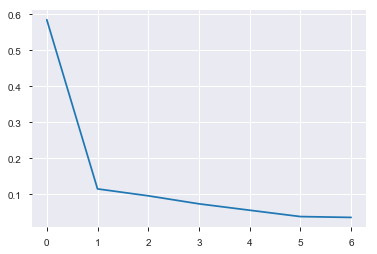

In [38]:
print(acp_reviews_score.explained_variance_ratio_)
# Eboulis des valeurs propres
pyplot.figure()
pyplot.plot(acp_reviews_score.explained_variance_ratio_)
pyplot.show()